In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('global_laptop_selling_data.csv')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [5]:
df = df.drop('laptop_ID', axis=1)

In [6]:
df.head() # y = df[['Price_euros']]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Preprocessing

In [7]:
df["Weight"] = df["Weight"].str.replace("kg","")
df["Weight"] = pd.to_numeric(df["Weight"])
df["Ram"] = df["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)

In [8]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), object(8)
memory usage: 117.2+ KB


In [10]:
df_product_price = df.groupby("Company")["Price_euros"].mean()

In [11]:
df_product_price

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [12]:
df_product_price = pd.DataFrame(data = df_product_price)
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)


Text(0.5, 1.0, 'Average Price Per Company')

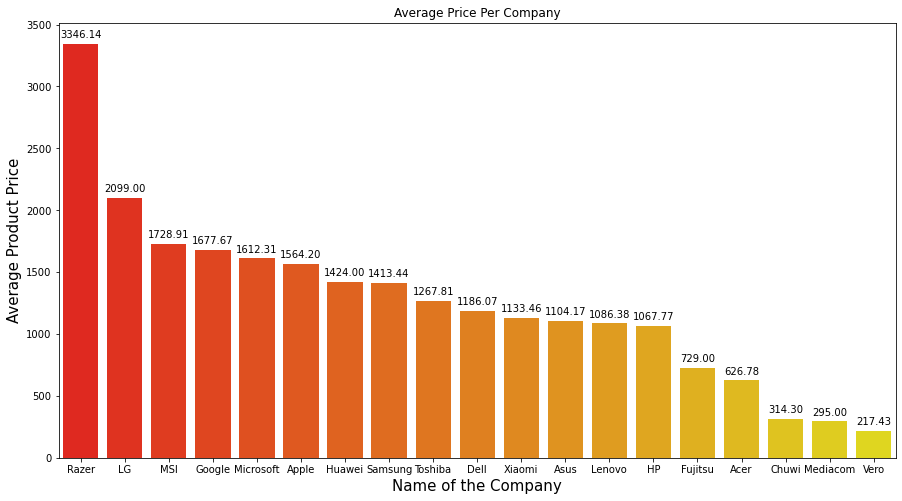

In [13]:
plt.figure(figsize = (15,8))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Name of the Company", size=15)
plt.ylabel("Average Product Price", size=15)
plt.title('Average Price Per Company')

# Keep Continue for Regression Model

In [14]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [15]:
df[['Screen','Screen_Resoluton_Height']] = df['ScreenResolution'].str.split('x',expand=True)
df["Screen_Resoluton_Height"] = pd.to_numeric(df["Screen_Resoluton_Height"])

In [16]:
df[["Screen_Display",'sep',"Screen_Resoluton_Weight"]] = df["Screen"].str.split("(\d\d)", n=1, expand=True)
df["Screen_Resoluton_Weight"] = df["sep"] + df["Screen_Resoluton_Weight"]
df["Screen_Resoluton_Weight"] = pd.to_numeric(df["Screen_Resoluton_Weight"])
df.drop('sep',axis=1,inplace=True)

In [17]:
df.drop('ScreenResolution',axis=1,inplace=True)

In [18]:
df.drop('Screen',axis=1,inplace=True)
df.drop('Screen_Display',axis=1,inplace=True)

In [19]:
df[['Cpu_Core','Cpu_Processor_Speed_GHz']] = df['Cpu'].str.rsplit(" ", n=1, expand=True)

In [20]:
df["Cpu_Processor_Speed_GHz"] = df["Cpu_Processor_Speed_GHz"].str.replace("GHz","")
df["Cpu_Processor_Speed_GHz"] = pd.to_numeric(df["Cpu_Processor_Speed_GHz"])

In [21]:
df.drop('Cpu',axis=1,inplace=True)
df.drop('Cpu_Core',axis=1,inplace=True)

In [22]:
df[['Memory(storage_amount)','Memory(storage_device)']] = df['Memory'].str.split(" ", n=1, expand=True)

In [23]:
df["Memory(storage_amount)_GB"] = df["Memory(storage_amount)"].str.replace("GB||TB","")
df["Memory(storage_amount)_GB"] = pd.to_numeric(df["Memory(storage_amount)_GB"])

<ipython-input-23-126a526c08ca>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Memory(storage_amount)_GB"] = df["Memory(storage_amount)"].str.replace("GB||TB","")


In [24]:
df.drop('Memory(storage_amount)',axis=True,inplace=True)

In [25]:
df.drop('Memory(storage_device)',axis=True,inplace=True)

In [26]:
df.drop('Memory',axis=1,inplace=True)

In [27]:
df[['Gpu_Graphics','sep','Gpu_Graphics_GB']] = df['Gpu'].str.split("(\d\d)", n=1, expand=True)
df["Gpu_Graphics_GB"] = df["sep"] + df["Gpu_Graphics_GB"]

In [28]:
df.drop('Gpu_Graphics',axis=1,inplace=True)

In [29]:
df.drop('Gpu',axis=1,inplace=True)

In [30]:
df.drop('sep',axis=1,inplace=True)

In [31]:
le=LabelEncoder()

In [32]:
df['TypeName']=le.fit_transform(df['TypeName'])

In [33]:
df['Company']=le.fit_transform(df['Company'])

In [34]:
df['OpSys']=le.fit_transform(df['OpSys'])

In [35]:
df['Product']=le.fit_transform(df['Product'])

In [36]:
df['Gpu_Graphics_GB']=le.fit_transform(df['Gpu_Graphics_GB'])

In [37]:
Scaler=StandardScaler()

In [38]:
df['Product']=Scaler.fit_transform(df[['Product']])

In [39]:
df['Gpu_Graphics_GB']=Scaler.fit_transform(df[['Gpu_Graphics_GB']])

In [40]:
df['Screen_Resoluton_Height']=Scaler.fit_transform(df[['Screen_Resoluton_Height']])

In [41]:
df['Screen_Resoluton_Weight']=Scaler.fit_transform(df[['Screen_Resoluton_Weight']])

In [42]:
df['Memory(storage_amount)_GB']=Scaler.fit_transform(df[['Memory(storage_amount)_GB']])

In [43]:
df.Gpu_Graphics_GB.nunique()

75

In [44]:
df.Inches.nunique()

18

In [45]:
df.Ram.nunique()

9

In [46]:
df.Product.nunique()

618

In [47]:
df.OpSys.nunique()

9

In [48]:
df.TypeName.nunique()

6

In [49]:
df.Product.nunique()

618

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    1303 non-null   int32  
 1   Product                    1303 non-null   float64
 2   TypeName                   1303 non-null   int32  
 3   Inches                     1303 non-null   float64
 4   Ram                        1303 non-null   int32  
 5   OpSys                      1303 non-null   int32  
 6   Weight                     1303 non-null   float64
 7   Price_euros                1303 non-null   float64
 8   Screen_Resoluton_Height    1303 non-null   float64
 9   Screen_Resoluton_Weight    1303 non-null   float64
 10  Cpu_Processor_Speed_GHz    1303 non-null   float64
 11  Memory(storage_amount)_GB  1303 non-null   float64
 12  Gpu_Graphics_GB            1303 non-null   float64
dtypes: float64(9), int32(4)
memory usage: 112.1 KB


In [51]:
df.head(1)

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Screen_Resoluton_Height,Screen_Resoluton_Weight,Cpu_Processor_Speed_GHz,Memory(storage_amount)_GB,Gpu_Graphics_GB
0,1,-0.047766,4,13.3,8,8,1.37,1339.69,1.860586,1.345362,2.3,-0.563807,0.71012


In [52]:
x=df.drop(['Price_euros'],axis=1)
y=df['Price_euros']

In [53]:
df

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Screen_Resoluton_Height,Screen_Resoluton_Weight,Cpu_Processor_Speed_GHz,Memory(storage_amount)_GB,Gpu_Graphics_GB
0,1,-0.047766,4,13.3,8,8,1.37,1339.69,1.860586,1.345362,2.3,-0.563807,0.710120
1,1,-0.041946,4,13.3,8,8,1.34,898.94,-0.600648,-0.919776,1.8,-0.563807,0.416937
2,7,-1.502761,3,15.6,8,4,1.86,575.00,0.032241,0.050997,2.5,0.169539,0.563528
3,1,-0.047766,4,15.4,16,8,1.83,2537.45,2.563795,1.992544,2.7,1.636230,-0.462613
4,1,-0.047766,4,13.3,8,8,1.37,1803.60,1.860586,1.345362,3.1,0.169539,0.758984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,1.581829,0,14.0,4,5,1.80,638.00,0.032241,0.050997,2.5,-0.563807,-0.022838
1299,10,1.628389,0,13.3,16,5,1.30,1499.00,2.563795,2.639726,2.5,1.636230,-0.022838
1300,10,-0.653044,3,14.0,2,5,1.50,229.00,-1.064766,-1.069437,1.6,-0.930480,1.638534
1301,7,-1.782120,3,15.6,6,5,2.19,764.00,-1.064766,-1.069437,2.5,-1.291423,-1.048980


In [54]:
Scaler=StandardScaler()
x=Scaler.fit_transform(x)

In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [56]:
Reg=LinearRegression()
Reg.fit(xtrain,ytrain)
Reg.score(xtest,ytest)

0.722798367401688

In [57]:
Reg.score(xtrain,ytrain)

0.7040260592585272

In [58]:
Reg.fit(x,y)
Reg.score(x,y)

0.7088260837871283

Text(0.5, 1.0, 'Blue:Actual\nRed:Predicted')

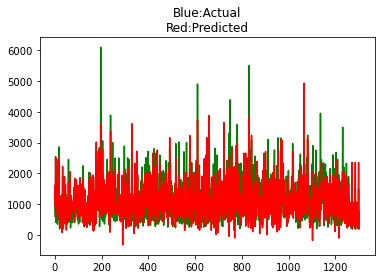

In [59]:
plt.plot(df['Price_euros'],color='green')
plt.plot(Reg.predict(x),color='red')
plt.title("Blue:Actual\nRed:Predicted")

In [60]:
Tree=DecisionTreeRegressor()
Tree.fit(xtrain,ytrain)
Tree.score(xtest,ytest)

0.7062039846965661

Text(0.5, 1.0, 'Blue:Actual\nRed:Predicted')

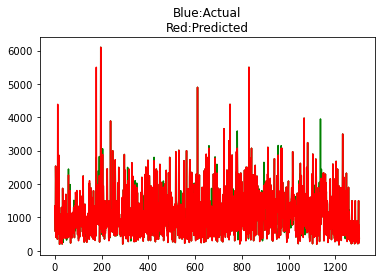

In [61]:
plt.plot(df['Price_euros'],color='green')
plt.plot(Tree.predict(x),color='red')
plt.title("Blue:Actual\nRed:Predicted")

In [62]:
Forest=RandomForestRegressor(n_estimators=25,random_state=3)
Forest.fit(xtrain,ytrain)
Forest.score(xtest,ytest)

0.8662004431036372

In [63]:
Forest=RandomForestRegressor(n_estimators=45,random_state=2)
Forest.fit(xtrain,ytrain)
Forest.score(xtest,ytest)

0.8656569411313711

In [64]:
Forest=RandomForestRegressor(n_estimators=15)
Forest.fit(xtrain,ytrain)
Forest.score(xtest,ytest)

0.8619222718783971

Text(0.5, 1.0, 'Blue:Actual\nRed:Predicted')

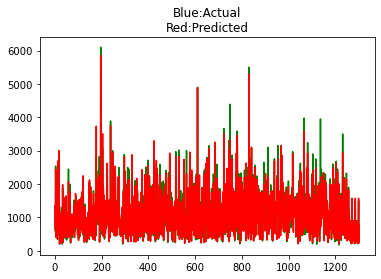

In [65]:
plt.plot(df['Price_euros'],color='green')
plt.plot(Forest.predict(x),color='red')
plt.title("Blue:Actual\nRed:Predicted")

In [66]:
KNN=KNeighborsRegressor(n_neighbors=7)
KNN.fit(xtrain,ytrain)
KNN.score(xtest,ytest)

0.804219167370393

Text(0.5, 1.0, 'Blue:Actual\nRed:Predicted')

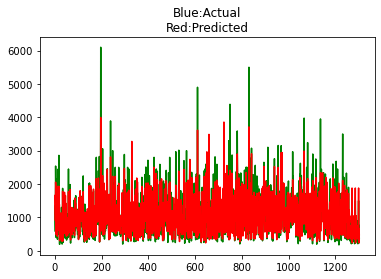

In [67]:
plt.plot(df['Price_euros'],color='green')
plt.plot(KNN.predict(x),color='red')
plt.title("Blue:Actual\nRed:Predicted")

In [68]:
XGB=XGBRegressor()
XGB.fit(xtrain,ytrain)
XGB.score(xtest,ytest)

0.8797900254182899

In [69]:
XGB=XGBRegressor(eta=0.3,n_estimators=105,verbosity=1,max_depth=5)
XGB.fit(xtrain,ytrain)
XGB.score(xtest,ytest)

0.9022850699903054

In [70]:
XGB.fit(x,y)
print(XGB.score(x,y))
XGB.fit(xtrain,ytrain)
print(XGB.score(xtest,ytest))

0.9890381364131031
0.9022850699903054


Text(0.5, 1.0, 'Blue:Actual\nRed:Predicted')

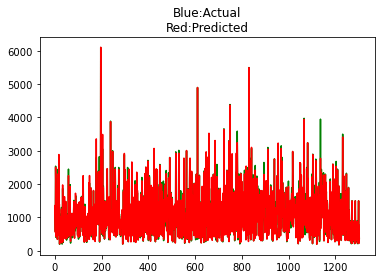

In [71]:
plt.plot(df['Price_euros'],color='green')
plt.plot(XGB.predict(x),color='red')
plt.title("Blue:Actual\nRed:Predicted")

In [72]:
ADBR=AdaBoostRegressor()
ADBR.fit(xtrain,ytrain)
ADBR.score(xtest,ytest)

0.657198941957655

In [73]:
ADBR.score(xtrain,ytrain)

0.6835840431159435

Text(0.5, 1.0, 'Blue:Actual\nRed:Predicted')

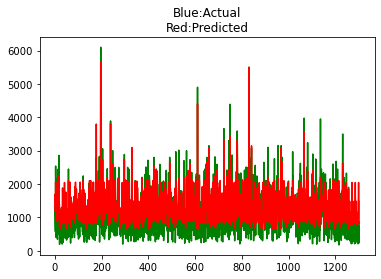

In [75]:
plt.plot(df['Price_euros'],color='green')
plt.plot(ADBR.predict(x),color='red')
plt.title("Blue:Actual\nRed:Predicted")

In [76]:
GBR=GradientBoostingRegressor()
GBR.fit(xtrain,ytrain)
GBR.score(xtrain,ytrain)

0.9268076749797025

In [77]:
GBR.score(xtest,ytest)

0.8652567030932757

Text(0.5, 1.0, 'Blue:Actual\nRed:Predicted')

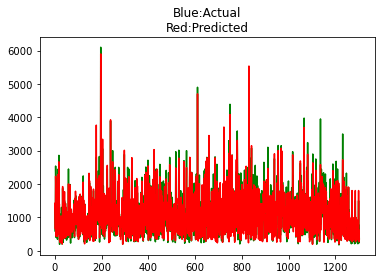

In [78]:
plt.plot(df['Price_euros'],color='green')
plt.plot(GBR.predict(x),color='red')
plt.title("Blue:Actual\nRed:Predicted")

In [79]:
SVM=SVR()
SVM.fit(xtrain,ytrain)
SVM.score(xtest,ytest)

-0.012029033645835296

Text(0.5, 1.0, 'Blue:Actual\nRed:Predicted')

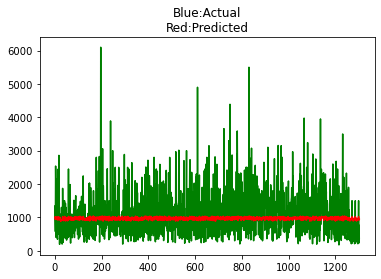

In [80]:
plt.plot(df['Price_euros'],color='green')
plt.plot(SVM.predict(x),color='red')
plt.title("Blue:Actual\nRed:Predicted")

In [81]:
Tree=DecisionTreeRegressor()
Forest=RandomForestRegressor(n_estimators=45,random_state=2)
Reg=LinearRegression()
KNN=KNeighborsRegressor(n_neighbors=7)
XGB=XGBRegressor(eta=0.3,n_estimators=105,verbosity=1,max_depth=5)
SVM=SVR()
ADBR=AdaBoostRegressor()
GBR=GradientBoostingRegressor()

In [82]:
Algo=[Tree,Forest,Reg,KNN,XGB,SVM,ADBR,GBR]
R2=[]
for K in Algo:
    K.fit(xtrain,ytrain)
    Pred=K.predict(xtest)
    R2.append(r2_score(ytest,Pred))

In [83]:
Table=pd.DataFrame()
Table['Algorithms']=["Tree","Forest","Reg","KNN","XGB","SVM","ADBR","GBR"]
Table['R2 Score']=R2

In [84]:
Table

,Algorithms,R2 Score
0,Tree,0.742665
1,Forest,0.865657
2,Reg,0.722798
3,KNN,0.804219
4,XGB,0.902285
5,SVM,-0.012029
6,ADBR,0.662563
7,GBR,0.865282


<AxesSubplot:xlabel='Algorithms', ylabel='R2 Score'>

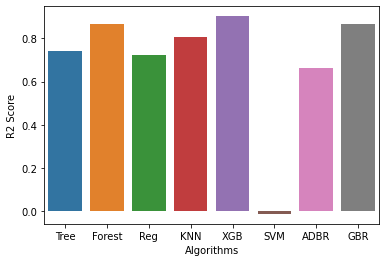

In [85]:
sns.barplot(x='Algorithms',y='R2 Score',data=Table)